Hunter Bennett | June 16 2021

In [23]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
%matplotlib inline
### imports ###
import sys
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib_venn import venn3
import seaborn as sns

# import custom functions
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from homer_preprocessing import import_homer_diffgene, read_homer_gene_exp, read_annotated_peaks
from plotting_scripts import plot_exp_rpkm, gene_list_bar_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
f1Dir = '/home/ttroutman/strainsKupffer/rnaKupfferF1/'
nsgDir = '/home/ttroutman/strainsKupffer/rnaKupfferNSG_20210201/'
workingDirectory = '/home/h1bennet/strains_manuscript/results/03_Strains_Manuscript_Compare_CB6F1_NSG//'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

In [25]:
if not os.path.isdir('./tpm_bar_plots/'):
    os.mkdir('./tpm_bar_plots/')

In [26]:
#### PLOTTING PARAMETERS FOR MANUSCRIPT ####
# # get matplotlib to save readable fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size'] = 6
matplotlib.rcParams['savefig.dpi'] = 500


# line widths
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['ytick.major.width'] = 1

# adjust defualt color for plots to black
# normal default is a dark gray
COLOR = 'black'
matplotlib.rcParams['text.color'] = COLOR
matplotlib.rcParams['axes.labelcolor'] = COLOR
matplotlib.rcParams['xtick.color'] = COLOR
matplotlib.rcParams['ytick.color'] = COLOR
matplotlib.rcParams['axes.edgecolor'] = COLOR

#### PLOT PARAMETERS FOR THIS PLOT ####

In [27]:
def paired_bar_plot_illus(gene, data, groups, group_labels,
                          pair_labels, pair_colors=['#bdbdbd', '#636363'],
                          width=0.5, capsize=10, ax=None):

    # only works with one gene
    
    # read in means, in this case group will be a list of pairs.
    means_g1 = []
    stds_g1 = []
    means_g2 = []
    stds_g2 = []
    for (group, label) in zip(groups_paired, group_labels_paired):
        means_g1.append(data.iloc[:, group[0]].reindex(gene).mean(1).values[0])
        stds_g1.append(data.iloc[:, group[0]].reindex(gene).std(1).values[0])
        means_g2.append(data.iloc[:, group[1]].reindex(gene).mean(1).values[0])
        stds_g2.append(data.iloc[:, group[1]].reindex(gene).std(1).values[0] )
        
    x = np.arange(len(group_labels))  # the label locations
    width = width  # the width of the bars
    
    # set axis
    if ax==None:
        ax = plt.gca()
    
    rects1 = ax.bar(x - width/2, means_g1, width, label=pair_labels[0], color=pair_colors[0],
                    yerr=[np.zeros(len(stds_g1)), stds_g1],
                    edgecolor='k',
                    linewidth=1,
                    error_kw={'elinewidth':1,
                              'capthick':1,
                              'capsize':capsize})
    rects2 = ax.bar(x + width/2, means_g2, width, label=pair_labels[1], color=pair_colors[1],
                    yerr=[np.zeros(len(stds_g2)), stds_g2],
                    edgecolor='k',
                    linewidth=1,
                    error_kw={'elinewidth':1,
                              'capthick':1,
                              'capsize':capsize})

    # Add some text for labels, title and custom x-axis tick labels, etc.
    # ax.set_ylabel('TPM')
    # ax.set_title('Scores by group and gender')
    ax.set_xticks(x)
    ax.set_xticklabels(group_labels_paired)
    ax.legend()


# Read in gene expression files

In [28]:
df_f1 = pd.read_csv('/home/ttroutman/strainsKupffer/rnaKupfferF1/rnaQuan/rawT.txt',
                    sep='\t',
                    index_col=0)

df_f1 = df_f1.loc[:, df_f1.columns.str.contains('variants')]

In [29]:
df_nsg = pd.read_csv('/home/ttroutman/strainsKupffer/rnaKupfferNSG_20210201/rnaQuan/rawT.txt',
                    sep='\t',
                    index_col=0)

### merge files

In [30]:
tpm_mat = df_f1.merge(df_nsg, left_index=True, right_index=True, how='outer')

### Make Plots

In [31]:
groups_paired = [[[8,9],[13,14]],
          [[10,11,12],[15,16,17]],
          [[0,1,2,3],[4,5,6,7]]]

group_labels_paired = ['F0', 'NSG', 'F1']

colors = ['#3182bd',
          '#31a354',
          '#08519c',
          '#006d2c',
          '#6baed6',
          '#74c476']

pair_colors = ['#3182bd', '#31a354']
pair_labels = ['BALB/cJ', 'C57BL/6J']

legend_elements = []
for lab, col in  zip(pair_labels, pair_colors):
    legend_elements.append(Patch(label=lab, color=col))

In [32]:
trans_genes = [ 'Tgfbi', 'Gsr', 'Hmga1b', 'Cxcr4', 'Cd52', 'Oas3']

* First column are trans genes that are not significantly different in either comparison.
* Second column are trans genes that are in the NSG and F0
* Third column are trans genes that are in the F1 and F0

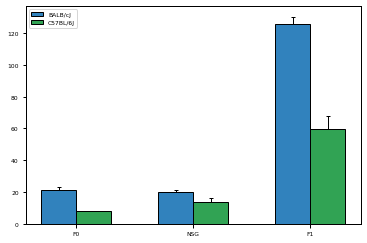

In [39]:
paired_bar_plot_illus(['Gcnt1'],
                          data=tpm_mat,
                          groups=groups_paired,
                          group_labels=group_labels_paired,
                          pair_labels=pair_labels,
                          pair_colors=pair_colors,
                          width=0.3,
                          capsize=2)
    

In [40]:
trans_genes = [ 'Tgfbi', 'Gsr', 'Adgb', 'Cxcr4', 'Sirpb1a', 'Oas3']

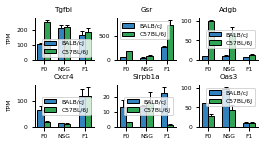

In [41]:
fig, axs = plt.subplots(2, 3, figsize=(4,2))
plt.subplots_adjust(wspace=0.4, hspace=0.6)


for gene, ax in zip(trans_genes, axs.flat):
    paired_bar_plot_illus([gene],
                          data=tpm_mat,
                          groups=groups_paired,
                          group_labels=group_labels_paired,
                          pair_labels=pair_labels,
                          pair_colors=pair_colors,
                          width=0.3,
                          capsize=2,
                          ax=ax)
    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # ax.get_legend().remove()
    ax.set_ylabel('')
    ax.set_title(gene)
    # ax.set_xticks([])
    # ax.set_xticklabels('')
    
axs[0][0].set_ylabel('TPM');
axs[1][0].set_ylabel('TPM');
# axs[2][0].set_ylabel('TPM');

plt.savefig('./figures/tpm_barplot_trans_gene_examples_legend.pdf',
            bbox_inches='tight')

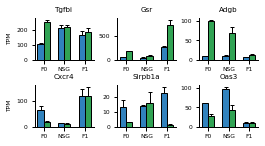

In [42]:
fig, axs = plt.subplots(2, 3, figsize=(4,2))
plt.subplots_adjust(wspace=0.4, hspace=0.6)


for gene, ax in zip(trans_genes, axs.flat):
    paired_bar_plot_illus([gene],
                          data=tpm_mat,
                          groups=groups_paired,
                          group_labels=group_labels_paired,
                          pair_labels=pair_labels,
                          pair_colors=pair_colors,
                          width=0.3,
                          capsize=2,
                          ax=ax)
    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.get_legend().remove()
    ax.set_ylabel('')
    ax.set_title(gene)
    # ax.set_xticks([])
    # ax.set_xticklabels('')
    
axs[0][0].set_ylabel('TPM');
axs[1][0].set_ylabel('TPM');
# axs[2][0].set_ylabel('TPM');

plt.savefig('./figures/tpm_barplot_trans_gene_examples_nolegend.pdf',
            bbox_inches='tight')

# Compare cis / trans / mixed lists...
How many trans regulated genes are shared between sets...

In [29]:
f1_dict = {}
for genelist in glob.glob('/home/h1bennet/strains_rna/results/K03_CB6F1_Kupffer_RNA/gene_lists/*filt_pval.txt'):
    with open(genelist, 'r') as f:
        listid = genelist.split('/')[-1].replace('.txt','')
        f1_dict[listid] = [i.strip() for i in f.readlines()[1:]]

In [30]:
nsg_dict = {}
for genelist in glob.glob('/home/h1bennet/strains_rna/results/K03_NSG_Kupffer_RNA/gene_lists/*filt_pval.txt'):
    with open(genelist, 'r') as f:
        listid = genelist.split('/')[-1].replace('.txt','')
        nsg_dict[listid] = [i.strip() for i in f.readlines()[1:]]

# Are mixed genes expressed in the F0

Compare expression to KC spec amit genes

In [64]:
with open('/gpfs/data01/glasslab/home/h1bennet/data/Amit_KC_genelist.txt', 'r') as f:
    kc_list = [i.strip().replace('\"','') for i in f.readlines()]

In [65]:
all_mixed = set(f1_dict['cb6f1_kupffer_mixed_c57_filt_pval']).union(f1_dict['cb6f1_kupffer_mixed_balb_filt_pval'])

In [67]:
set_expression = [
    np.log2(tpm_mat.loc[kc_list, tpm_mat.columns.str.contains('c57bl6j_control')].mean(1)+1),
    np.log2(tpm_mat.loc[all_mixed, tpm_mat.columns.str.contains('c57bl6j_control')].mean(1)+1),
    np.log2(tpm_mat.loc[kc_list, tpm_mat.columns.str.contains('balbcj_control')].mean(1)+1),
    np.log2(tpm_mat.loc[all_mixed, tpm_mat.columns.str.contains('balbcj_control')].mean(1)+1)]

/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [85]:
colors = ['#31a354', '#a1d99b', '#3182bd', '#9ecae1']
labels = ['C57BL/6J F0 KC Spec',
               'C57BL/6J F0 Mixed',
               'BALB/cJ F0 KC Spec',
               'BALB/cJ F0 Mixed' ]

legend_elements = []
for lab, col in  zip(labels, colors):
    legend_elements.append(Patch(label=lab, color=col))

In [86]:
c='k'

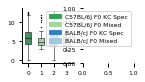

In [91]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(2,1))
c='k'
g = sns.boxplot(data=set_expression,
                boxprops=dict(edgecolor=c),
                capprops=dict(color=c),
                whiskerprops=dict(color=c),
                flierprops=dict(color=c, markeredgecolor=c),
                medianprops=dict(color=c),
                palette = ['#31a354',
                           '#a1d99b',
                           '#3182bd',
                           '#9ecae1'],
                ax=ax1,
                width=0.5,
                linewidth=0.5,
                showfliers=True,
                # rasterized=True,
                # legend=True,
                fliersize=0.5)

# Hide the right and top spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)


ax2.legend(handles=legend_elements)

plt.savefig('./figures/mixed_gene_expression_f0.pdf',
            bbox_inches='tight')

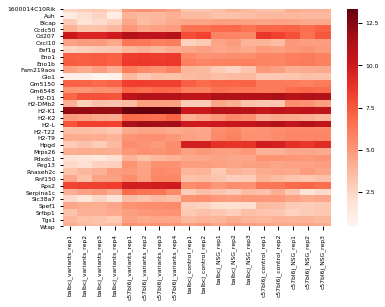

In [84]:
sns.heatmap(
    np.log2(tpm_mat.loc[f1_dict['cb6f1_kupffer_mixed_c57_filt_pval'], :]+1),
    cmap='Reds')

# Pull average expression

In [47]:
tpm_mat.columns

Index(['balbcj_variants_rep1', 'balbcj_variants_rep2', 'balbcj_variants_rep3',
       'balbcj_variants_rep4', 'c57bl6j_variants_rep1',
       'c57bl6j_variants_rep2', 'c57bl6j_variants_rep3',
       'c57bl6j_variants_rep4', 'balbcj_control_rep1', 'balbcj_control_rep2',
       'balbcj_NSG_rep1', 'balbcj_NSG_rep2', 'balbcj_NSG_rep3',
       'c57bl6j_control_rep1', 'c57bl6j_control_rep2', 'c57bl6j_NSG_rep1',
       'c57bl6j_NSG_rep2', 'c57bl6j_NSG_rep3'],
      dtype='object')

In [44]:
tpm_mat.loc[f1_dict['cb6f1_kupffer_mixed_balb_filt_pval'],
            tpm_mat.columns.str.contains('c57bl6j_control')].mean(1)

4931440P22Rik       7.2715
Alpk1              31.9365
Ap1s2              54.7545
Apool               7.4415
Arhgap4           120.3640
Atp10d             24.4085
Atp7a              26.8505
Brox               26.6425
Ccrl2              10.6385
Cd99l2              9.1755
Chchd2             30.2625
Chm                15.4445
Coro2a             34.4365
Diaph2             19.4545
Elf4               71.3260
Fech               36.7330
Flna              186.7605
Fmr1               22.2085
Ftl1             3436.4185
Fus                83.0995
Gdi1               82.9615
Gla                 8.5675
Glrx               20.6440
Gm7367             17.6610
Gm8615              6.4820
Hmga1              19.7420
Hmga1b             21.1520
Hnrnph2            20.1815
Huwe1              36.8060
Magt1              33.8505
Map3k15            14.7000
Mbtps2             16.4105
Mospd2             61.9500
Ndufc2             40.6920
Paqr4               7.2010
Pdk3               15.1315
Psma3               6.9075
R

In [45]:
tpm_mat.loc[f1_dict['cb6f1_kupffer_mixed_balb_filt_pval'],
            tpm_mat.columns.str.contains('balbcj_control')].mean(1)

4931440P22Rik       8.3685
Alpk1              59.9450
Ap1s2              52.1620
Apool              11.1275
Arhgap4           103.5845
Atp10d             36.8770
Atp7a              27.2175
Brox               26.2660
Ccrl2              14.9060
Cd99l2             13.4945
Chchd2             58.7945
Chm                12.6635
Coro2a             62.7685
Diaph2             12.5545
Elf4               45.1380
Fech               33.1465
Flna              216.0105
Fmr1               21.4405
Ftl1             6537.1870
Fus               123.9875
Gdi1               77.2400
Gla                17.4720
Glrx               34.8530
Gm7367             30.2985
Gm8615             10.1165
Hmga1               7.7230
Hmga1b              7.8180
Hnrnph2            30.8580
Huwe1              33.3235
Magt1              41.2035
Map3k15            14.5260
Mbtps2             17.8080
Mospd2             49.0235
Ndufc2             35.0340
Paqr4              13.8000
Pdk3               11.3950
Psma3               9.4390
R

Compare overlap of all sets...

In [31]:
for key in f1_dict.keys():
    print(key)
    print(len(f1_dict[key]), 'genes in F1 set')
    print(len(nsg_dict[key]), 'genes in NSG set')
    shared = set(nsg_dict[key]).intersection(f1_dict[key])
    total = set(nsg_dict[key]).union(f1_dict[key])
    print('%i / %i genes shared' % (len(shared), len(total)))

cb6f1_kupffer_trans_balb_filt_pval
63 genes in F1 set
84 genes in NSG set
35 / 112 genes shared
cb6f1_kupffer_cis_balb_filt_pval
39 genes in F1 set
77 genes in NSG set
27 / 89 genes shared
cb6f1_kupffer_cis_c57_filt_pval
44 genes in F1 set
73 genes in NSG set
36 / 81 genes shared
cb6f1_kupffer_trans_c57_filt_pval
61 genes in F1 set
88 genes in NSG set
44 / 105 genes shared
cb6f1_kupffer_mixed_c57_filt_pval
33 genes in F1 set
17 genes in NSG set
2 / 48 genes shared
cb6f1_kupffer_mixed_balb_filt_pval
52 genes in F1 set
18 genes in NSG set
3 / 67 genes shared


In [13]:
df_f1 = pd.read_csv('/home/ttroutman/strainsKupffer/rnaKupfferF1//rnaDiff/balbcj_variants.vs.c57bl6j_variants.scatter.txt',
                    sep='\t', index_col=0)


In [14]:
df_nsg = pd.read_csv('/home/ttroutman/strainsKupffer/rnaKupfferNSG_20210201//rnaDiff/balbcj_NSG.vs.c57bl6j_NSG.scatter.txt',
                 sep='\t', index_col=0)

In [18]:
df_control = pd.read_csv('/home/ttroutman/strainsKupffer/rnaKupfferNSG_20210201//rnaDiff/balbcj_control.vs.c57bl6j_control.scatter.txt',
                         sep='\t', index_col=0)

In [21]:
df = df_control.merge(df_f1.merge(df_nsg, left_index=True, right_index=True, how='inner', suffixes=('_f1','_nsg')),
                      left_index=True,
                      right_index=True,
                      how='inner',
                      suffixes=('_control', ''))

# We will use a custom ordering to separate into F0, F1, NSG specific

First write out sets to a new list

In [148]:
if not os.path.isdir('./gene_list_subsets/'):
    os.mkdir('./gene_list_subsets')

In [149]:
for key in nsg_dict.keys():
    
    shared_set = df.reindex(set(nsg_dict[key]).intersection(f1_dict[key])).dropna().index.tolist()
    f1_only = df.reindex(set(f1_dict[key]).difference(nsg_dict[key])).dropna().index.tolist()
    nsg_only = df.reindex(set(nsg_dict[key]).difference(f1_dict[key])).dropna().index.tolist()
    
    sets = [shared_set, f1_only, nsg_only]
    set_labels = ['shared_set', 'f1_only', 'nsg_only']
    
    for listname, genelist in zip(set_labels, sets):
        print(key+'_'+listname, ":", len(genelist))
        with open('./gene_list_subsets/'+key+'_'+listname+'_.txt', 'w') as f:
            f.write('Gene\n')
            for i in genelist:
                f.write(i+'\n')
            f.close()

cb6f1_kupffer_trans_balb_filt_pval_shared_set : 35
cb6f1_kupffer_trans_balb_filt_pval_f1_only : 23
cb6f1_kupffer_trans_balb_filt_pval_nsg_only : 5
cb6f1_kupffer_cis_balb_filt_pval_shared_set : 27
cb6f1_kupffer_cis_balb_filt_pval_f1_only : 5
cb6f1_kupffer_cis_balb_filt_pval_nsg_only : 23
cb6f1_kupffer_cis_c57_filt_pval_shared_set : 36
cb6f1_kupffer_cis_c57_filt_pval_f1_only : 3
cb6f1_kupffer_cis_c57_filt_pval_nsg_only : 14
cb6f1_kupffer_trans_c57_filt_pval_shared_set : 44
cb6f1_kupffer_trans_c57_filt_pval_f1_only : 15
cb6f1_kupffer_trans_c57_filt_pval_nsg_only : 3
cb6f1_kupffer_mixed_c57_filt_pval_shared_set : 2
cb6f1_kupffer_mixed_c57_filt_pval_f1_only : 30
cb6f1_kupffer_mixed_c57_filt_pval_nsg_only : 6
cb6f1_kupffer_mixed_balb_filt_pval_shared_set : 3
cb6f1_kupffer_mixed_balb_filt_pval_f1_only : 48
cb6f1_kupffer_mixed_balb_filt_pval_nsg_only : 9


# Check promoter motifs just in case

In [150]:
if not os.path.isdir('./promoter_motif_subsets/'):
    os.mkdir('./promoter_motif_subsets/')

In [ ]:
%%bash

for i in ./gene_list_subsets/*.txt;
do out=${i/gene_list_subsets/promoter_motif_subsets};
out=${out/.txt/_motifs};
findMotifs.pl $i mouse $out -p 8; done

## Trans

44
15
3


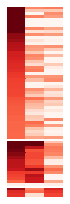

In [139]:
key = 'cb6f1_kupffer_trans_c57_filt_pval'
shared_set = df.reindex(set(nsg_dict[key]).intersection(f1_dict[key])).dropna().index.tolist()
f1_only = df.reindex(set(f1_dict[key]).difference(nsg_dict[key])).dropna().index.tolist()
nsg_only = df.reindex(set(nsg_dict[key]).difference(f1_dict[key])).dropna().index.tolist()

sets = [shared_set, f1_only, nsg_only]
set_lengths = [len(i) for i in sets]

f, axs = plt.subplots(3, 1, figsize=(1,3.5), gridspec_kw={'height_ratios': set_lengths})
plt.subplots_adjust(hspace=0.025)
for geneset, ax in zip(sets, axs):
    print(len(geneset))
    sns.heatmap(df.loc[geneset, log2fc_cols].sort_values('log2FoldChange', ascending=False),
                cmap='Reds',
                # linewidth=1,
                # linecolor='k',
                # z_score=2,
                vmin=0,
                vmax=2,
                # annot=True,
                fmt='.1f',
                xticklabels=0,
                yticklabels=0,
                cbar=False,
                cbar_kws={'orientation':'vertical',
                          'pad':0.05,
                          'label':'-log2fc'},
                ax=ax)

plt.savefig('./figures/'+key+'_heatmap_custom_order.pdf',
            bbox_inches='tight')

35
23
5


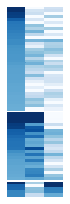

In [140]:
key = 'cb6f1_kupffer_trans_balb_filt_pval'
shared_set = df.reindex(set(nsg_dict[key]).intersection(f1_dict[key])).dropna().index.tolist()
f1_only = df.reindex(set(f1_dict[key]).difference(nsg_dict[key])).dropna().index.tolist()
nsg_only = df.reindex(set(nsg_dict[key]).difference(f1_dict[key])).dropna().index.tolist()

sets = [shared_set, f1_only, nsg_only]
set_lengths = [len(i) for i in sets]

f, axs = plt.subplots(3, 1, figsize=(1,3.5), gridspec_kw={'height_ratios': set_lengths})
plt.subplots_adjust(hspace=0.025)
for geneset, ax in zip(sets, axs):
    print(len(geneset))
    sns.heatmap(-df.loc[geneset, log2fc_cols].sort_values('log2FoldChange', ascending=True),
                cmap='Blues',
                # linewidth=1,
                # linecolor='k',
                # z_score=2,
                vmin=0,
                vmax=2,
                # annot=True,
                fmt='.1f',
                xticklabels=0,
                yticklabels=0,
                cbar=False,
                cbar_kws={'orientation':'horizontal',
                          'pad':0.05,
                          'label':'-log2fc'},
                ax=ax)

plt.savefig('./figures/'+key+'_heatmap_custom_order.pdf',
            bbox_inches='tight')

# Mixed

2
30
6


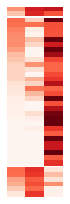

In [141]:
key = 'cb6f1_kupffer_mixed_c57_filt_pval'
shared_set = df.reindex(set(nsg_dict[key]).intersection(f1_dict[key])).dropna().index.tolist()
f1_only = df.reindex(set(f1_dict[key]).difference(nsg_dict[key])).dropna().index.tolist()
nsg_only = df.reindex(set(nsg_dict[key]).difference(f1_dict[key])).dropna().index.tolist()

sets = [shared_set, f1_only, nsg_only]
set_lengths = [len(i) for i in sets]

f, axs = plt.subplots(3, 1, figsize=(1,3.5), gridspec_kw={'height_ratios': set_lengths})
plt.subplots_adjust(hspace=0.025)
for geneset, ax in zip(sets, axs):
    print(len(geneset))
    sns.heatmap(df.loc[geneset, log2fc_cols].sort_values('log2FoldChange', ascending=False),
                cmap='Reds',
                # linewidth=1,
                # linecolor='k',
                # z_score=2,
                vmin=0,
                vmax=2,
                # annot=True,
                fmt='.1f',
                xticklabels=0,
                yticklabels=0,
                cbar=False,
                cbar_kws={'orientation':'vertical',
                          'pad':0.05,
                          'label':'-log2fc'},
                ax=ax)
    

plt.savefig('./figures/'+key+'_heatmap_custom_order.pdf',
            bbox_inches='tight')

3
48
9


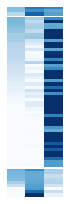

In [142]:
key = 'cb6f1_kupffer_mixed_balb_filt_pval'
shared_set = df.reindex(set(nsg_dict[key]).intersection(f1_dict[key])).dropna().index.tolist()
f1_only = df.reindex(set(f1_dict[key]).difference(nsg_dict[key])).dropna().index.tolist()
nsg_only = df.reindex(set(nsg_dict[key]).difference(f1_dict[key])).dropna().index.tolist()

sets = [shared_set, f1_only, nsg_only]
set_lengths = [len(i) for i in sets]

f, axs = plt.subplots(3, 1, figsize=(1,3.5), gridspec_kw={'height_ratios': set_lengths})
plt.subplots_adjust(hspace=0.025)
for geneset, ax in zip(sets, axs):
    print(len(geneset))
    sns.heatmap(-df.loc[geneset, log2fc_cols].sort_values('log2FoldChange', ascending=True),
                cmap='Blues',
                # linewidth=1,
                # linecolor='k',
                # z_score=2,
                vmin=0,
                vmax=2,
                # annot=True,
                fmt='.1f',
                xticklabels=0,
                yticklabels=0,
                cbar=False,
                cbar_kws={'orientation':'horizontal',
                          'pad':0.05,
                          'label':'-log2fc'},
                ax=ax)
    

plt.savefig('./figures/'+key+'_heatmap_custom_order.pdf',
            bbox_inches='tight')

36
3
14


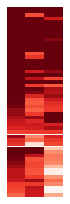

In [143]:
key = 'cb6f1_kupffer_cis_c57_filt_pval'
shared_set = df.reindex(set(nsg_dict[key]).intersection(f1_dict[key])).dropna().index.tolist()
f1_only = df.reindex(set(f1_dict[key]).difference(nsg_dict[key])).dropna().index.tolist()
nsg_only = df.reindex(set(nsg_dict[key]).difference(f1_dict[key])).dropna().index.tolist()

sets = [shared_set, f1_only, nsg_only]
set_lengths = [len(i) for i in sets]

f, axs = plt.subplots(3, 1, figsize=(1,3.5), gridspec_kw={'height_ratios': set_lengths})
plt.subplots_adjust(hspace=0.025)
for geneset, ax in zip(sets, axs):
    print(len(geneset))
    sns.heatmap(df.loc[geneset, log2fc_cols].sort_values('log2FoldChange', ascending=False),
                cmap='Reds',
                # linewidth=1,
                # linecolor='k',
                # z_score=2,
                vmin=0,
                vmax=2,
                # annot=True,
                fmt='.1f',
                xticklabels=0,
                yticklabels=0,
                cbar=False,
                cbar_kws={'orientation':'vertical',
                          'pad':0.05,
                          'label':'-log2fc'},
                ax=ax)


plt.savefig('./figures/'+key+'_heatmap_custom_order.pdf',
            bbox_inches='tight')

27
5
23


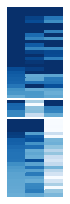

In [145]:
key = 'cb6f1_kupffer_cis_balb_filt_pval'
shared_set = df.reindex(set(nsg_dict[key]).intersection(f1_dict[key])).dropna().index.tolist()
f1_only = df.reindex(set(f1_dict[key]).difference(nsg_dict[key])).dropna().index.tolist()
nsg_only = df.reindex(set(nsg_dict[key]).difference(f1_dict[key])).dropna().index.tolist()

sets = [shared_set, f1_only, nsg_only]
set_lengths = [len(i) for i in sets]

f, axs = plt.subplots(3, 1, figsize=(1,3.5), gridspec_kw={'height_ratios': set_lengths})
plt.subplots_adjust(hspace=0.025)
for geneset, ax in zip(sets, axs):
    print(len(geneset))
    sns.heatmap(-df.loc[geneset, log2fc_cols].sort_values('log2FoldChange', ascending=True),
                cmap='Blues',
                # linewidth=1,
                # linecolor='k',
                # z_score=2,
                vmin=0,
                vmax=2,
                # annot=True,
                fmt='.1f',
                xticklabels=0,
                yticklabels=0,
                cbar=False,
                cbar_kws={'orientation':'horizontal',
                          'pad':0.05,
                          'label':'-log2fc'},
                ax=ax)
    

plt.savefig('./figures/'+key+'_heatmap_custom_order.pdf',
            bbox_inches='tight')